# 4.10 Instacart Final Task

### Contents
#### 1. Import Libraries and Dataframes
#### 2. Create regional segmentation of data
#### 3. Determine whether there’s a difference in spending habits between the different U.S. regions
#### 4. Create an exclusion flag for low-activity customers
#### 5. Customer profiling
#### 6. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### 7. Compare customer profiles with regions and departments
#### 8. orders by day of week
#### 9. orders by hour of day
#### 10. loyalty vs. family status
#### 11. loyalty vs. dependant

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy  

# Import Data

In [31]:
df=pd.read_pickle(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/02 Data/Prepared Data/df.pkl')

Identifying personally identifiable information (PII):

Colmuns of 'first_name', 'surname' are identified as PII.

## Create a “Region” column based on the “State” column

In [34]:
df['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [35]:
# Assign northeast region

df.loc[ df ['state'] == 'Maine', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Hampshire', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Vermont', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Massachusetts', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Rhode Island', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'Connecticut', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New York', 'region'] = 'Northeast'
df.loc[ df ['state'] == 'New Jersey', 'region'] = 'Northeast'

In [36]:
# Assign midwest region

df.loc[ df ['state'] == 'Wisconsin', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Michigan', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Illinois', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Indiana', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Ohio', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'North Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'South Dakota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Nebraska', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Kansas', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Minnesota', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Iowa', 'region'] = 'Midwest'
df.loc[ df ['state'] == 'Missouri', 'region'] = 'Midwest'

In [37]:
# Assign south region

df.loc[ df ['state'] == 'Delaware', 'region'] = 'South'
df.loc[ df ['state'] == 'Maryland', 'region'] = 'South'
df.loc[ df ['state'] == 'District of Columbia', 'region'] = 'South'
df.loc[ df ['state'] == 'Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'West Virginia', 'region'] = 'South'
df.loc[ df ['state'] == 'North Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'South Carolina', 'region'] = 'South'
df.loc[ df ['state'] == 'Georgia', 'region'] = 'South'
df.loc[ df ['state'] == 'Florida', 'region'] = 'South'
df.loc[ df ['state'] == 'Kentucky', 'region'] = 'South'
df.loc[ df ['state'] == 'Tennessee', 'region'] = 'South'
df.loc[ df ['state'] == 'Mississippi', 'region'] = 'South'
df.loc[ df ['state'] == 'Alabama', 'region'] = 'South'
df.loc[ df ['state'] == 'Oklahoma', 'region'] = 'South'
df.loc[ df ['state'] == 'Texas', 'region'] = 'South'
df.loc[ df ['state'] == 'Arkansas', 'region'] = 'South'
df.loc[ df ['state'] == 'Louisiana', 'region'] = 'South'

In [38]:
# Assign west region

df.loc[ df ['state'] == 'Idaho', 'region'] = 'West'
df.loc[ df ['state'] == 'Montana', 'region'] = 'West'
df.loc[ df ['state'] == 'Wyoming', 'region'] = 'West'
df.loc[ df ['state'] == 'Nevada', 'region'] = 'West'
df.loc[ df ['state'] == 'Utah', 'region'] = 'West'
df.loc[ df ['state'] == 'Colorado', 'region'] = 'West'
df.loc[ df ['state'] == 'Arizona', 'region'] = 'West'
df.loc[ df ['state'] == 'New Mexico', 'region'] = 'West'
df.loc[ df ['state'] == 'Alaska', 'region'] = 'West'
df.loc[ df ['state'] == 'Washington', 'region'] = 'West'
df.loc[ df ['state'] == 'Oregon', 'region'] = 'West'
df.loc[ df ['state'] == 'California', 'region'] = 'West'
df.loc[ df ['state'] == 'Hawaii', 'region'] = 'West'

In [39]:
# check output

df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Determine whether there’s a difference in spending habits between the different U.S. regions.

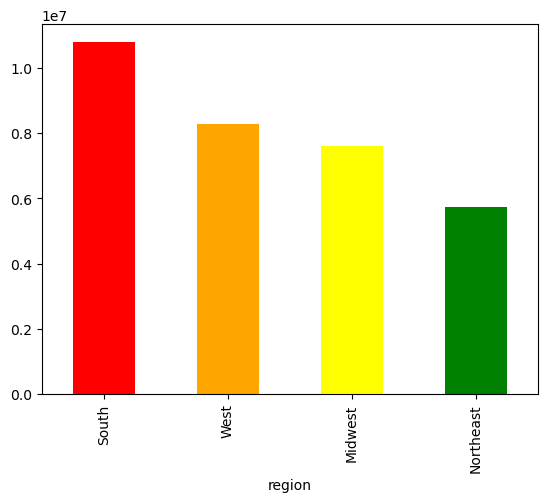

In [41]:
bar=df['region'].value_counts().plot.bar(color=['red','orange','yellow','green'])

spending in the south region is the highest and lowest in northwest
((the south region contains the most states among all the regions))

In [43]:
#export chart
bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/region_bar.png')

## Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [45]:
#create activity flag
df.loc[ df ['max_order'] <5 , 'activity_flag'] = 'low-activity customer'
df.loc[ df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [46]:
# check value counts

df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [47]:
# exclude the low-activity customers from the dataframe

df_new = df[df['activity_flag'] == 'high-activity customer']

In [79]:
# export the new dataframe

df_new.to_pickle(r'/Users/yasersouri/Desktop/new_df2.pkl')

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [50]:
# Create an income group variable based on the income levels in the dataframe
# Assign 'low-income' to individuals with income less than or equal to 55,000
df_new.loc[df_new['income'] <= 55000, 'income_group'] = 'low-income'

# Assign 'middle-income' to individuals with income between 55,001 and 150,000
df_new.loc[(df_new['income'] > 55000) & (df_new['income'] <= 150000), 'income_group'] = 'middle-income'

# Assign 'high-income' to individuals with income greater than 150,000
df_new.loc[df_new['income'] > 150000, 'income_group'] = 'high-income'

/var/folders/cd/8vl1s70d6dqgshpmc74wr4hw0000gn/T/ipykernel_54165/126582490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['income'] <= 55000, 'income_group'] = 'low-income'


In [51]:
# Check the counts of income groups

df_new['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

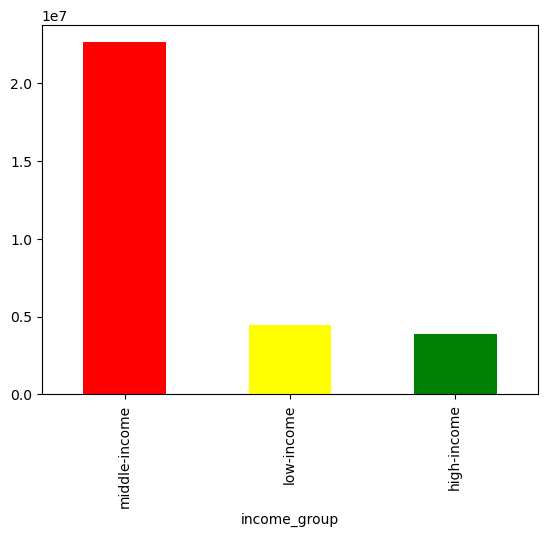

In [52]:
# Make a bar chart showing the distribution of income groups

income_group_counts = df_new['income_group'].value_counts(dropna=False)

# Create a bar chart from the income group counts
income_group_distribution_bar = income_group_counts.plot.bar(color=['red','yellow','green']) 


In [53]:
#export chart
income_group_distribution_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/income_bar.png')

In [75]:
# Create an age group variable based on the 'age' column in the DataFrame
# Assign 'young adult' to individuals aged 25 or younger
df_new.loc[df_new['age'] <= 25, 'age_group'] = 'young adult'

# Assign 'adult' to individuals aged between 26 and 44
df_new.loc[(df_new['age'] > 25) & (df_new3['age'] <= 44), 'age_group'] = 'adult'

# Assign 'middle-aged' to individuals aged between 45 and 64
df_new.loc[(df_new['age'] > 44) & (df_new3['age'] <= 64), 'age_group'] = 'middle-aged'

# Assign 'senior' to individuals aged 65 and older
df_new.loc[df_new['age'] > 64, 'age_group'] = 'senior'

/var/folders/cd/8vl1s70d6dqgshpmc74wr4hw0000gn/T/ipykernel_54165/874289341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['age'] <= 25, 'age_group'] = 'young adult'


In [77]:
# Check value counts for each age group

age_group_counts=df_new3['age_group'].value_counts(dropna = False)
age_group_counts


age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

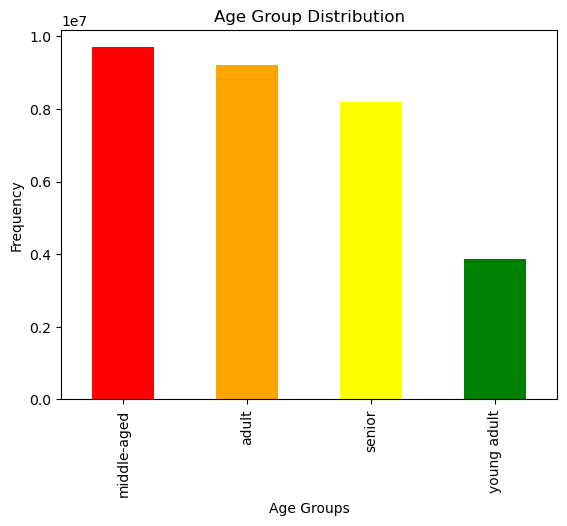

In [56]:

    # Create the bar chart
    age_group_bar=age_group_counts.plot.bar(color=['red','orange','yellow','green'])
    
    # Set chart title and labels
    plt.title('Age Group Distribution')
    plt.xlabel('Age Groups')
    plt.ylabel('Frequency')
    plt.show()

In [57]:
# Create a dependents flag
# Set the 'dependants_flag' to 'no dependants' for rows where 'n_dependants' is 0
df_new.loc[df_new['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'

# Set the 'dependants_flag' to 'has dependants' for rows where 'n_dependants' is 1 or more
df_new.loc[df_new['n_dependants'] >= 1, 'dependants_flag'] = 'has dependants'

/var/folders/cd/8vl1s70d6dqgshpmc74wr4hw0000gn/T/ipykernel_54165/836735001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['n_dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [58]:
# Check value counts for the 'dependants_flag' column in the DataFrame

dependants_counts=df_new['dependants_flag'].value_counts(dropna=False)
dependants_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

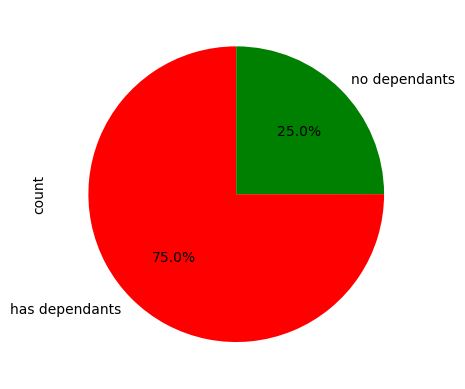

In [59]:
# Make a pie chart showing the percentage of dependants

dependants_pie = dependants_counts.plot.pie(
    autopct='%1.1f%%',  # Format the percentage display on the pie chart
    labels=['has dependants', 'no dependants'],  # Labels for the pie chart sections
    startangle=90,  # Start the pie chart at a 90-degree angle
    colors=['red', 'green']) # Define colors for the pie chart sections


In [60]:
# export pie
dependants_pie.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/dependants_pie.png')

In [61]:
# export age_group_bar
age_group_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/age_group_bar.png')

## loyalty vs. age groups

In [81]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_new['loyalty_flag'], df_new['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult,NaN
loyalty_flag,,,,,
Loyal customer,1246666,2277956,2723958,1280451,2755062
New customer,570808,1054954,1276659,599858,1301416
Regular customer,1919199,3481867,4194927,1984209,4296574


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

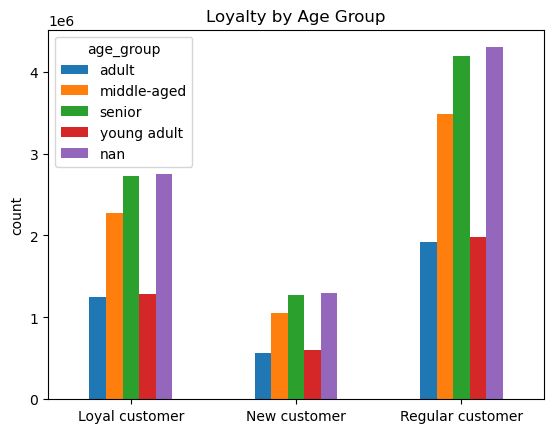

In [83]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

loyalty is higher among middle-aged customers

In [ ]:
#export bar chart
loyalty_age_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_age_fig.png')

## income vs. loyalty

In [ ]:
# Crosstab loyalty with age group
loyalty_income_cross = pd.crosstab(df_new['loyalty_flag'], df_new['income_group'], dropna = False)
loyalty_age_cross

In [ ]:
# bar chart
loyalty_income_bar = loyalty_income_cross.plot.bar()
plt.title('Loyalty by income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

loyalty is higher among middle-income customers

In [ ]:
#export bar chart
loyalty_income_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_income_bar.png')

## orders by department

In [6]:
#import new dataframe combined with departments dataframe
df_new3=pd.read_pickle(r'/Users/yasersouri/Desktop/new_df3.pkl')

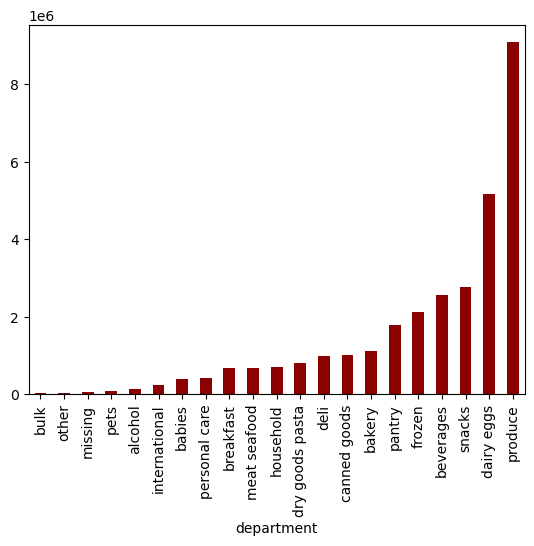

In [6]:
# bar chart frequency of orders vs department
depts_bar = df_new3['department'].value_counts(ascending=True).plot.bar(color='darkred')

In [8]:
#export bar chart
depts_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/depts_orders_bar.png')

produce products are the highest orders followed by dairy eggs

## Age vs. departments

In [10]:
# crosstab age group vs department
age_dept_cross = pd.crosstab(df_new3['age_group'], df_new3['department'], dropna = False)
age_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adult,18083,48490,136311,306989,80713,3926,121374,627519,121725,97645,...,84083,31419,80128,7828,4236,214933,51470,10507,1101907,334256
middle-aged,32747,92235,248107,571752,148487,7236,221889,1135552,221681,180841,...,153894,55968,147618,14437,7594,392344,95486,19740,1988842,609528
senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
young adult,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616
NaN,37916,112229,300540,690797,180877,9038,274990,1398546,270674,222136,...,188436,69031,181305,17205,9179,480959,113302,25080,2452694,748457


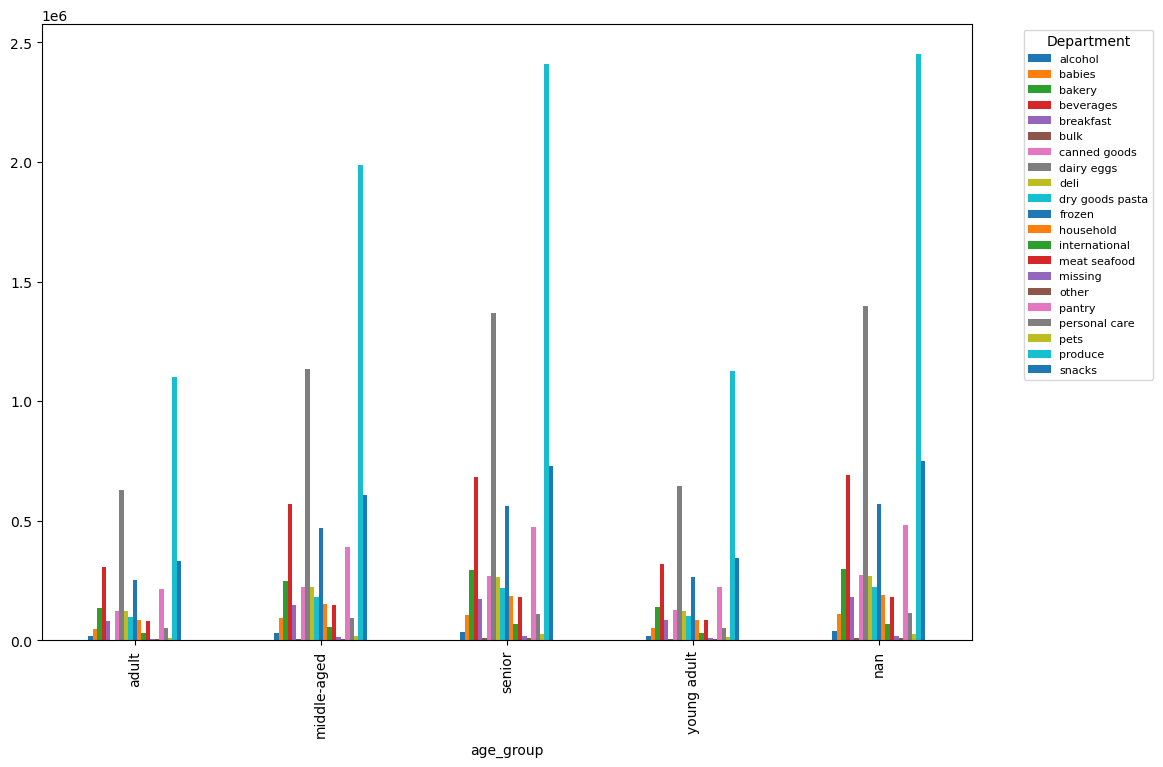

In [28]:
# bar chart
age_dept_bar = age_dept_cross.plot.bar(figsize=(12,8))
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10)

In [31]:
#export bar chart
age_dept_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/depts_age_bar.png')

## Income vs. department

In [37]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_new3['income_group'], df_new3['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,24067,53001,148430,313325,83418,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53530,12991,1134490,305779
low-income,22199,43438,144086,479742,116540,5974,112945,680816,141758,92401,...,111508,30240,54717,8902,4958,226221,62888,11782,1139552,673753
middle-income,98361,313953,828312,1778834,470892,23806,766740,3837217,736190,623400,...,495675,192929,528550,47613,24899,1324569,307888,68287,6805231,1786874


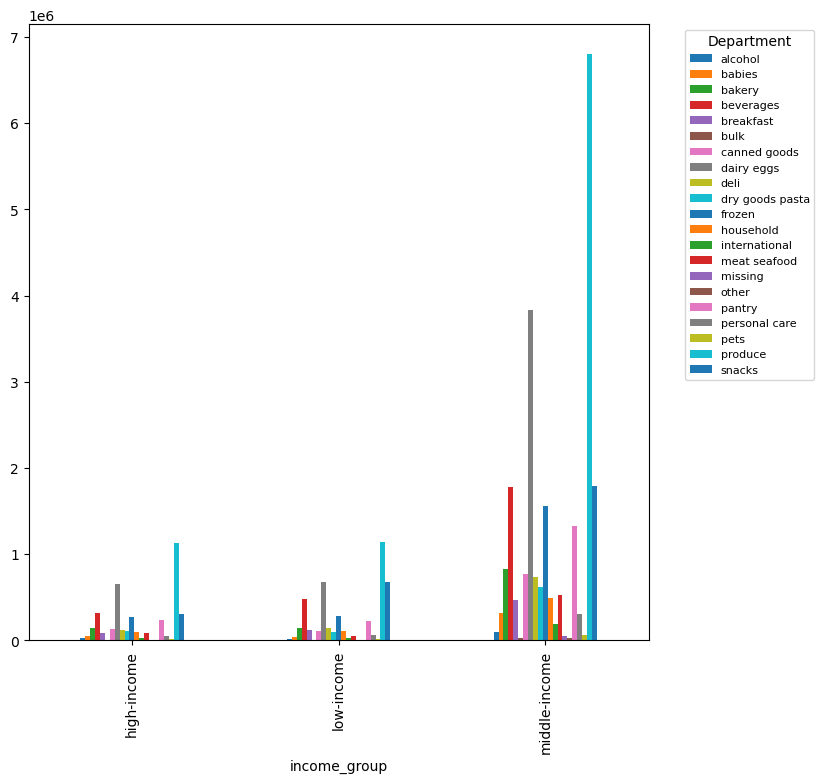

In [47]:
# bar chart
income_dept_bar = income_dept_cross.plot.bar(figsize=(8,8))
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10)

In [49]:
#export bar chart
income_dept_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/depts_income_bar.png')

## Aggregate the max, mean, and min variables on a customer-profile level

In [58]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_new3.groupby(['user_id', 'gender', 'state', 'region', 'n_dependants', 'family_status', 'age_group', 'user_order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'dependants_flag', 'income_group', 'spending_flag','frequency_flag'])['prices'].sum().reset_index()


In [60]:
customer_profile.head()

,user_id,gender,state,region,n_dependants,family_status,age_group,user_order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,dependants_flag,income_group,spending_flag,frequency_flag,prices
0,1,Female,Alabama,South,3,married,adult,1,2,8,New customer,has dependants,low-income,Low Spender,Frequent customer,31.6
1,1,Female,Alabama,South,3,married,adult,2,3,7,New customer,has dependants,low-income,Low Spender,Frequent customer,35.4
2,1,Female,Alabama,South,3,married,adult,3,3,12,New customer,has dependants,low-income,Low Spender,Frequent customer,28.2
3,1,Female,Alabama,South,3,married,adult,4,4,7,New customer,has dependants,low-income,Low Spender,Frequent customer,26.0
4,1,Female,Alabama,South,3,married,adult,5,4,15,New customer,has dependants,low-income,Low Spender,Frequent customer,57.0


In [62]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'user_order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [66]:
customer_agg.head()

user_order_number                prices                   
                      max min       mean    max    min        mean
user_id                                                           
1                      10   1   5.500000   63.1   25.0   37.570000
100                     5   1   3.000000   97.6   23.4   53.240000
1000                    7   1   4.000000  134.4  112.9  123.714286
10000                  72   1  36.811321  272.3   17.3  112.473585
100000                  9   1   5.000000  247.4   44.9  102.844444

In [68]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_new3.groupby('user_id').agg({'user_order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [70]:
freq_agg.head()

user_order_number                days_since_prior_order        \
                      max min       mean                    max   min   
user_id                                                                 
1                      10   1   5.813559                   30.0   0.0   
10                      5   1   3.223776                   30.0  12.0   
100                     5   1   3.555556                   30.0  18.0   
1000                    7   1   3.980583                   30.0   5.0   
10000                  72   1  35.973443                   17.0   0.0   

                    
              mean  
user_id             
1        20.259259  
10       20.746377  
100      26.320000  
1000     11.647727  
10000     4.949580

## Compare your customer profiles with regions and departments

In [73]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_new3['region'], df_new3['department'], dropna = False)
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


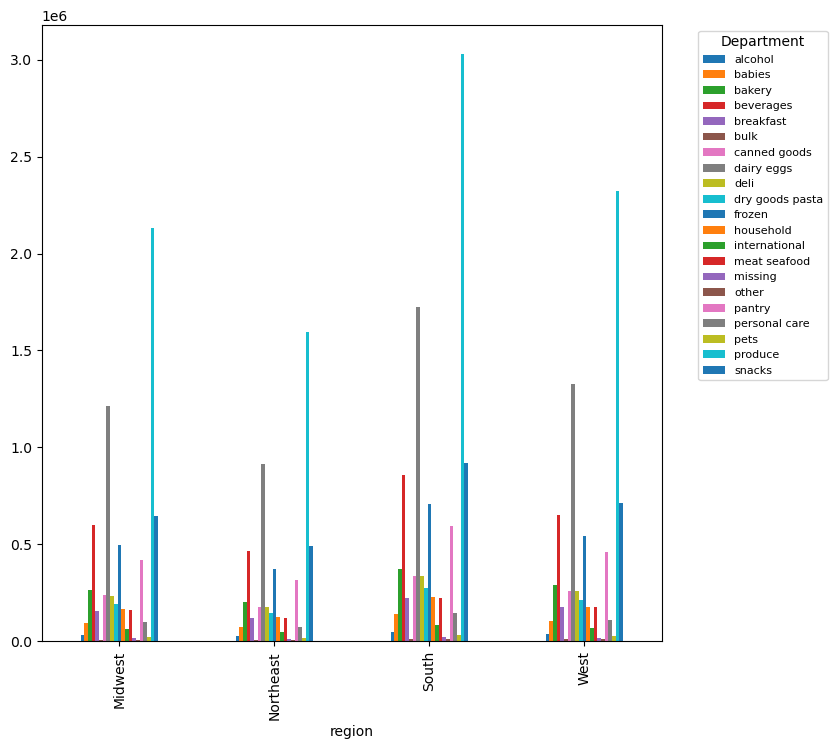

In [81]:
# bar chart
region_dept_bar = region_dept_cross.plot.bar(figsize=(8,8))
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10)

In [83]:
#export bar chart
region_dept_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/depts_region_bar.png')

## orders by day of week

Text(0.5, 0, '')

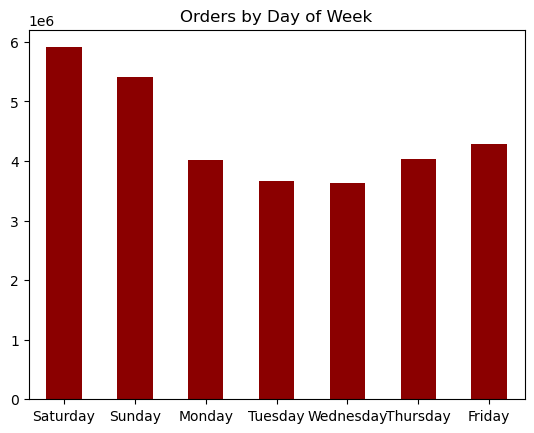

In [8]:
# bar chart orders by day of week
orders_dow_bar = df_new3['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'darkred')
orders_dow_bar.set_title('Orders by Day of Week')
orders_dow_bar.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
orders_dow_bar.set_xlabel("")

## orders by hour of day

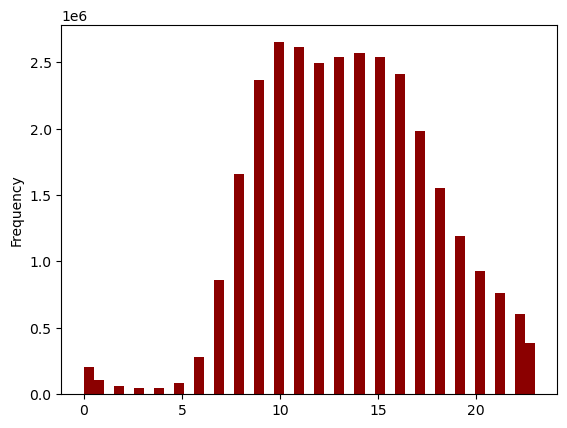

In [14]:
# histogram of hours of the day
hod_hist=df_new3['order_hour_of_day'].plot.hist(bins =45,color='darkred')

## loyalty vs family status

In [96]:
# Crosstab loyalty with family status
loyalty_fam_cross = pd.crosstab(df_new3['loyalty_flag'], df_new3['family_status'], dropna = False)
loyalty_fam_cross

family_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

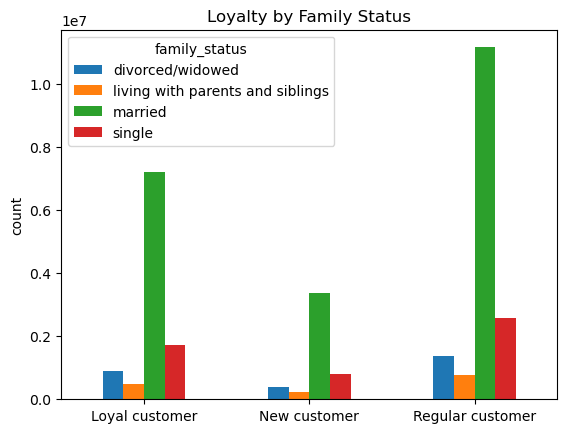

In [100]:
# bar chart
# bar chart
loyalty_fam_bar = loyalty_fam_cross.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)


## loyalty vs dependant

In [103]:
# Crosstab loyalty with dependants
loyalty_depend_cross = pd.crosstab(df_new3['loyalty_flag'], df_new3['dependants_flag'], dropna = False)
loyalty_depend_cross

dependants_flag,has dependants,no dependants
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,3602430,1201265
Regular customer,11927204,3949572


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

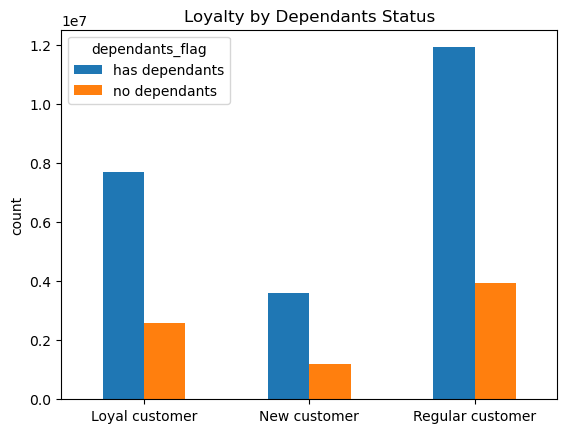

In [105]:
# bar chart
loyalty_depend_bar = loyalty_depend_cross.plot.bar()
plt.title('Loyalty by Dependants Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [8]:
df_new3.shape

(30964564, 39)

In [12]:
#export bar chart
orders_dow_bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/orders_dow_bar.png')

In [16]:
#export bar chart
hod_hist.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/hod_orders_hist.png')